In [1]:
import sys,os,yaml
import torch
import logging
sys.path.append(os.path.abspath(os.path.join('../../')))
#sys.path.append(os.path.dirname('__file__') + os.sep + '../')
import matplotlib.pylab as plt
import model as M
import dataset.segpcDataset as D

In [2]:
ck_path = "/data1/lzy2020/segpc2021/tmp/Train_Step_2600.pth"

In [3]:
cfgs = yaml.load(open("../../config/cfgSegpc2021.yaml", "r"), Loader=yaml.FullLoader)
n_classes = cfgs["n_classes"]
multi_gpu = cfgs["gpus"]
Net = cfgs["net_name"]
imageDir = cfgs["image_root"]
epochs = cfgs["epochs"]
trainBatchSize = cfgs["batch_size_train"]
checkpoint_dir = cfgs["checkpoint_dir"]
checkpoint_space = cfgs["checkpoint_space"]
train_loader, val_loader, test_loader = D.getDataLoader(imageDir, trainBatchSize)

using fold # 1


In [4]:
if Net == "unet":
    net = M.Unet(in_channels=3, classes=n_classes)
elif Net == "unetplusplus":
    net = M.UnetPlusPlus(in_channels=3, classes=n_classes)
elif Net == "linknet":
    net = M.Linknet(in_channels=3, classes=n_classes)
elif Net == "fpn":
    net = M.FPN(in_channels=3, classes=n_classes)
elif Net == "pspnet":
    net = M.PSPNet(in_channels=3, classes=n_classes)
elif Net == "deeplabv3":
    net = M.DeepLabV3(in_channels=3, classes=n_classes)
elif Net == "deeplabv3plus":
    net = M.DeepLabV3Plus(in_channels=3, classes=n_classes)
elif Net == "pan":
    net = M.PAN(in_channels=3, classes=n_classes)
os.environ["CUDA_VISIBLE_DEVICES"] = multi_gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')
net.to(device=device)
net.load_state_dict(torch.load(ck_path, map_location=device))

<All keys matched successfully>

In [6]:
for batch in test_loader:
    imgs = batch["image"]  # (1,c,h,w)
    mask = batch['mask']  # (1,h,w)
    imgs = imgs.to(device=device, dtype=torch.float32)
    ############################################
    with torch.no_grad():
        masks_pred = net(imgs)  # (1,n_classes,H,W)
    masks_pred = torch.argmax(masks_pred, dim=1)# (1,H,W)
    break

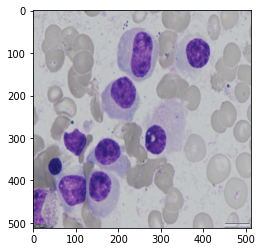

In [17]:
plt.imshow(imgs[0].permute(1,2,0).cpu() /255)

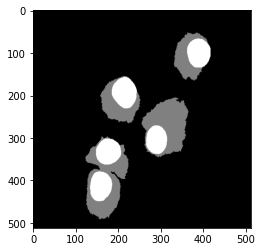

In [11]:
plt.imshow(mask.permute(1,2,0), cmap="gray")

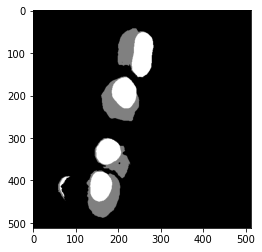

In [13]:
plt.imshow(masks_pred.cpu().permute(1,2,0), cmap="gray")